# Warm-up Task
Create an xy dataset with 100 points that roughly resembles y = 2x plus some noise

In [4]:
import numpy as np

np.random.seed(0) # seed the random number generator for reproducible results

x = list(range(100))
y = []
for val in x:
    y.append(2 * val + np.random.normal(0, 25))
#print(y)

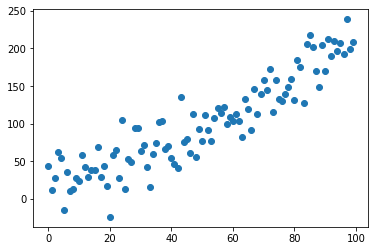

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

Goals
* To fit a line to this data (should be close y = 2x)
* y = mx + b

## Linear Regression
* Recall: Supervised machine learning tasks where the "class" is categorical is called classification
    * But when the "class" is continuous, the tasks are called regression
* There are several regression algorithms (called regressors in Sci-kit Learn)
    * Linear regression
    * kNN regressor
    * Decision tree regressor
    * Support vector regressor
    * Etc. 

## Warmup Task
* Recall y = mx + b
* With the basic least squares approach, the fit line has to pass through (mean_x, mean_y)
* Calculate m (slope) using the formula
* Calculate b (y intercept) by plugging in m, mean_x, mean_y

In [7]:
mean_x = np.mean(x)
mean_y = np.mean(y)

num_prods = []
den_squares = []
for i in range(len(x)):
    num_prods.append((x[i] - mean_x) * (y[i] - mean_y))
    den_squares.append((x[i] - mean_x) ** 2)
m = sum(num_prods) / sum(den_squares)
b = mean_y - m * mean_x # y - mx = b
print("m:", m, "b:", b)

m: 1.924917458430444 b: 5.211786196055144


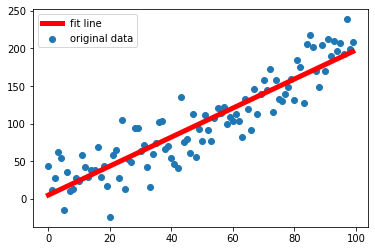

In [8]:
plt.figure()
plt.scatter(x, y, label="original data")
plt.plot([min(x), max(x)], [m * min(x) + b, m * max(x) + b], label="fit line", color="red", lw=5)
plt.legend()
plt.show()

In [9]:
# check our work with scipy
import scipy.stats as stats

m, b, r, p_value, std_err = stats.linregress(x, y)
print("m:", m, "b:", b, "r:", r)

m: 1.9249174584304443 b: 5.2117861960551295 r: 0.9113097511932392


In [11]:
# let's use our fit line to make a prediction for an unseen x value
test_instance = 100
y_predicted = m * test_instance + b
print("y predicted:", y_predicted, "residual (error):", 2 * test_instance - y_predicted)

y predicted: 197.70353203909954 residual (error): 2.2964679609004577


In [13]:
# check our work with sci-kit learn
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
# we need to reshape our x list into a 2D array: [[0], [1], [2], ... [99]]
x = np.reshape(x, (-1, 1)) # 100 x 1
reg.fit(x, y)
y_predicted = reg.predict([[test_instance]])
print("y predicted:", y_predicted, "residual (error):", 2 * test_instance - y_predicted)

y predicted: [197.70353204] residual (error): [2.29646796]


## Regression Evaluation Metrics 
Goal is to quantify the strength of the linear relationship between x (independent var) and y (dependent var)
* Correlation ($r$): a value in $[-1.0, 1.0]$
    * 1.0 is a perfect linear relationship: as x increases, y increases; as x decreases; y decreases
    * -1.0 is a perfect **inverse** linear relationship: as x increases, y decreases; as x decreases, y increases
    * At or near 0.0: this means there is no linear relationship (x and y are independent)
    * Use `stats.pearsonr(x, y)` to calculate correlation coefficient
    * **NOTE: correlation does not imply causation**
* Coefficient of determination ($R^2$): a value in $[0.0, 1.0]$
    * The proportion of variation in y that is explained by x
    * The larger your $R^2$, the better your model (e.g. the stronger the relationship between x and y)
    * Note: R^2 is the default scoring metric for sci-kit learn linear regression
* Others (for further study)
    * Standard error
    * Mean absolute error
    * Mean squared error
    * Root mean squared error
    * (normalized variations)
    * Etc. 

In [14]:
print("R^2:", r * r)
# 83% of the variation in y is explained by x

R^2: 0.8304854626198835
